In [2]:
using Pkg;Pkg.update(); for p in ("LinearAlgebra","Knet","FileIO"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using FileIO,LinearAlgebra;
using Base.Iterators: flatten
using Statistics: mean
using Knet: Knet, conv4, pool, mat, KnetArray, nll, zeroone, progress, sgd, param, param0, dropout, relu, Data,minibatch;
using Dates

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %            ]  69.8 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [3]:
using Plots; default(fmt=:png,ls=:auto)

┌ Info: Recompiling stale cache file /home/ec2-user/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [13]:
#cnn9 with 500 epo
cnn13=Knet.load("models/dcnn8.jld2","results");

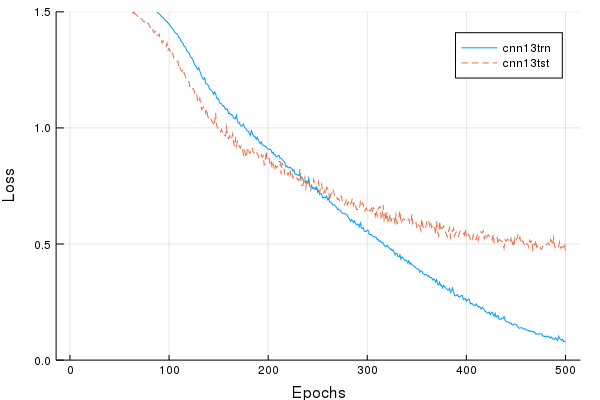

In [4]:
plot([cnn13[1,:],cnn13[2,:]],ylim=(0.0,1.5),
     labels=[:cnn13trn :cnn13tst],xlabel="Epochs",ylabel="Loss")

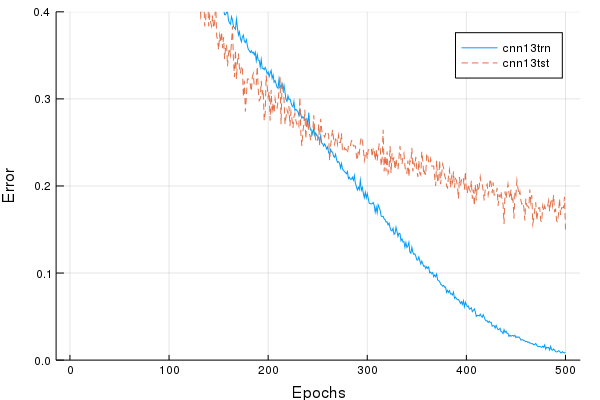

In [41]:
plot([cnn13[3,:],cnn13[4,:]],ylim=(0.0,0.4),
    labels=[:cnn13trn :cnn13tst],xlabel="Epochs",ylabel="Error")  

In [25]:
cnn14=Knet.load("models/dcnn8_2.jld2","results");
#cnn13 with epoch 650

Error encountered while loading "models/dcnn8_2.jld2".
Fatal error:


SystemError: SystemError: opening file models/dcnn8_2.jld2: No such file or directory

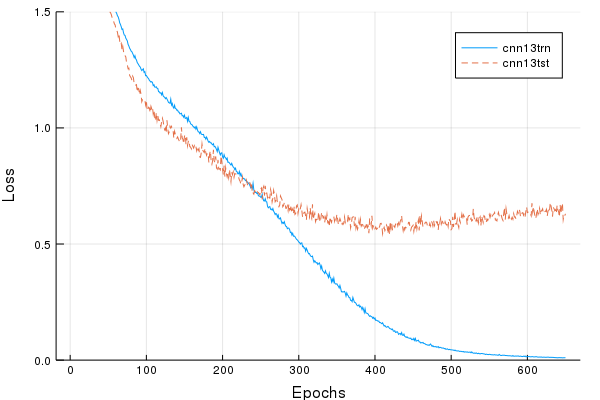

In [43]:
plot([cnn14[1,:],cnn14[2,:]],ylim=(0.0,1.5),
     labels=[:cnn13trn :cnn13tst],xlabel="Epochs",ylabel="Loss")

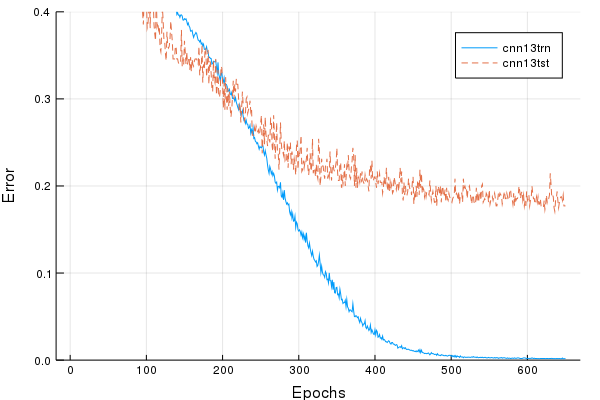

In [44]:
plot([cnn14[3,:],cnn14[4,:]],ylim=(0.0,0.4),
    labels=[:cnn13trn :cnn13tst],xlabel="Epochs",ylabel="Error")  

In [12]:
cnn15=Knet.load("models/dcnn8_3.jld2","results");
#cnn13 with epoch 650 - lr= 0,0075

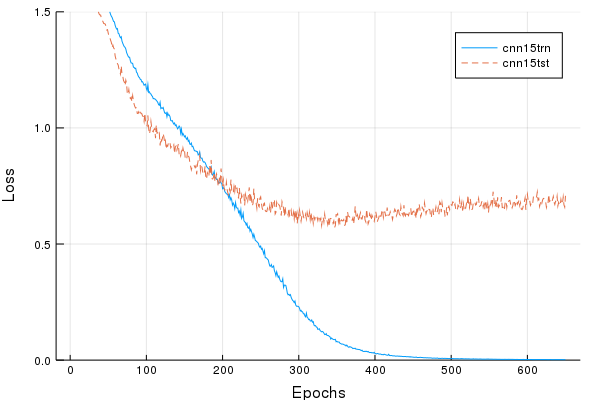

In [22]:
plot([cnn15[1,:],cnn15[2,:]],ylim=(0.0,1.5),
     labels=[:cnn15trn :cnn15tst],xlabel="Epochs",ylabel="Loss")

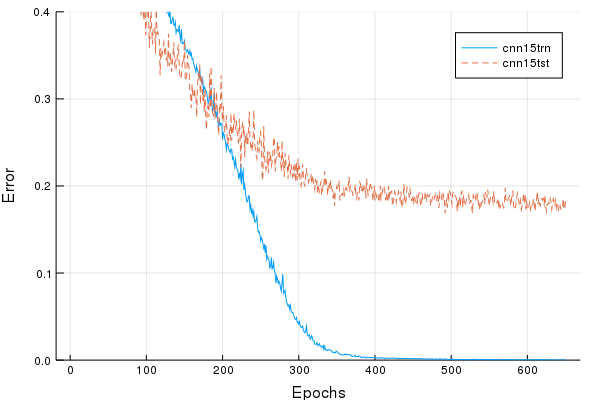

In [23]:
plot([cnn15[3,:],cnn15[4,:]],ylim=(0.0,0.4),
    labels=[:cnn15trn :cnn15tst],xlabel="Epochs",ylabel="Error")  

In [7]:
cnn16=Knet.load("models/dcnn8_4.jld2","results");
#cnn13 with epoch 650 - lr= 0,0075

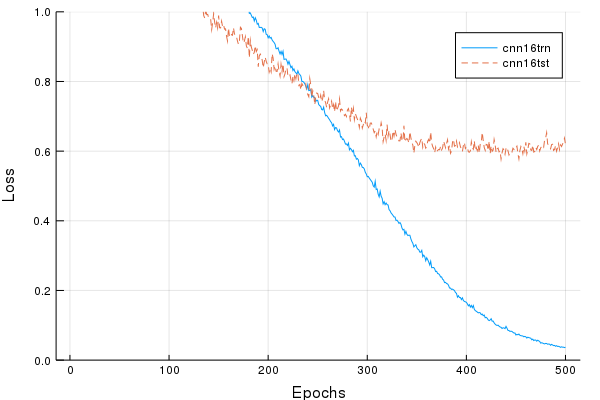

In [9]:
plot([cnn16[1,:],cnn16[2,:]],ylim=(0.0,1.0),
     labels=[:cnn16trn :cnn16tst],xlabel="Epochs",ylabel="Loss")

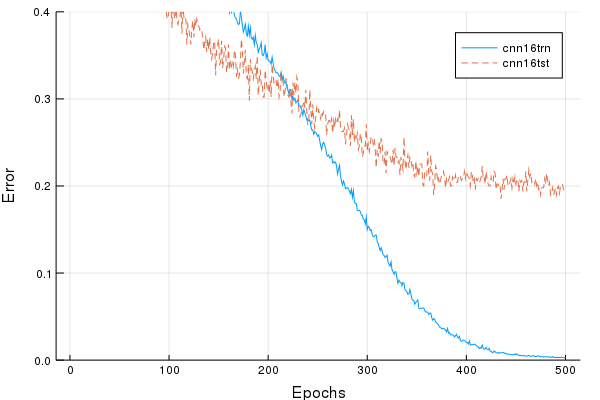

In [10]:
plot([cnn16[3,:],cnn16[4,:]],ylim=(0.0,0.4),
    labels=[:cnn16trn :cnn16tst],xlabel="Epochs",ylabel="Error")  

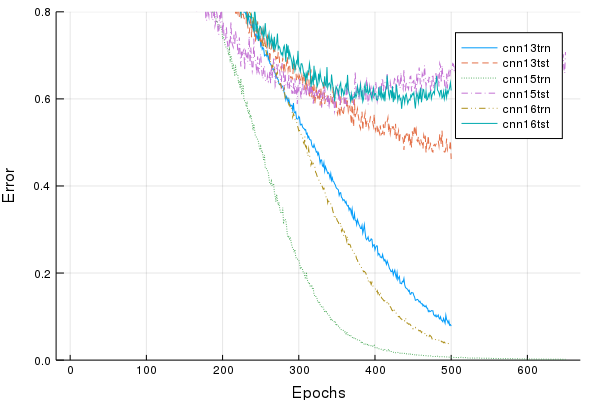

In [17]:
plot([cnn13[1,:],cnn13[2,:],cnn15[1,:],cnn15[2,:],cnn16[1,:],cnn16[2,:]],ylim=(0.0,0.8),
    labels=[ :cnn13trn :cnn13tst :cnn15trn :cnn15tst :cnn16trn :cnn16tst ],xlabel="Epochs",ylabel="Error")  

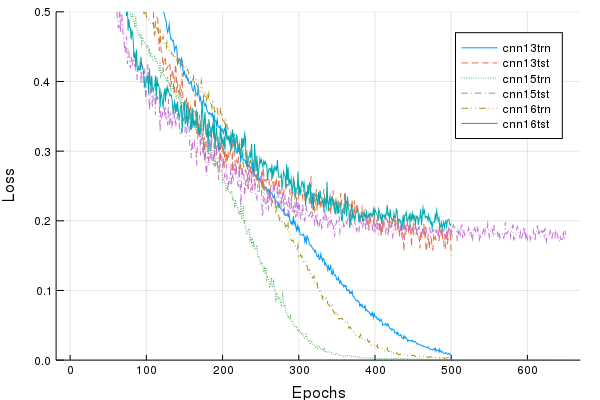

In [19]:
plot([cnn13[3,:],cnn13[4,:],cnn15[3,:],cnn15[4,:],cnn16[3,:],cnn16[4,:]],ylim=(0.0,0.5),
     labels=[:cnn13trn :cnn13tst :cnn15trn :cnn15tst :cnn16trn :cnn16tst],xlabel="Epochs",ylabel="Loss")

In [20]:
"CNN13", ("Train accuracy",(1-cnn13[3,:][end])),("Test accuracy",1-cnn13[4,:][end])

("CNN13", ("Train accuracy", 0.9911765f0), ("Test accuracy", 0.85f0))

In [22]:
"CNN15", ("Train accuracy",(1-cnn15[3,:][end])),("Test accuracy",1-cnn15[4,:][end])

("CNN15", ("Train accuracy", 0.9998162f0), ("Test accuracy", 0.8145833f0))

In [23]:
"CNN16", ("Train accuracy",(1-cnn16[3,:][end])),("Test accuracy",1-cnn16[4,:][end])

("CNN16", ("Train accuracy", 0.996875f0), ("Test accuracy", 0.8041667f0))

In [1]:
#using adadelta

In [12]:
cnn17

4×300 Array{Float32,2}:
 1.787     1.70056   1.69529   1.69834   …  1.65425   1.65302   1.6546  
 1.76175   1.75742   1.72243   1.7873       1.6932    1.69159   1.6754  
 0.786765  0.770772  0.770956  0.770956     0.770588  0.775551  0.770588
 0.722917  0.81875   0.81875   0.81875      0.81875   0.866667  0.81875 

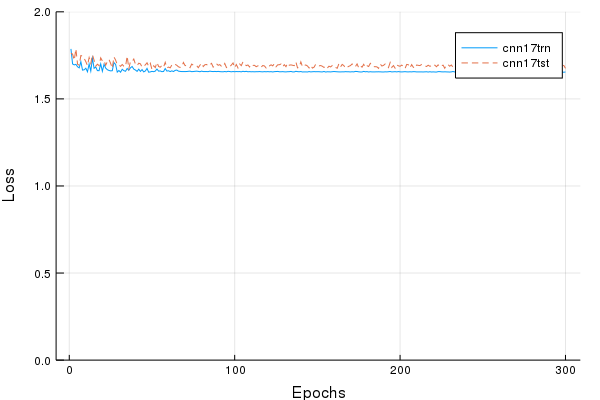

In [10]:
cnn17=Knet.load("models/dcnn9_1.jld2","results");
#dcnn6 λ1=4f-3 lr=0.95 ep=300 dropout=0.7,0.5
plot([cnn17[1,:],cnn17[2,:]],ylim=(0.0,2.0),
     labels=[:cnn17trn :cnn17tst],xlabel="Epochs",ylabel="Loss")


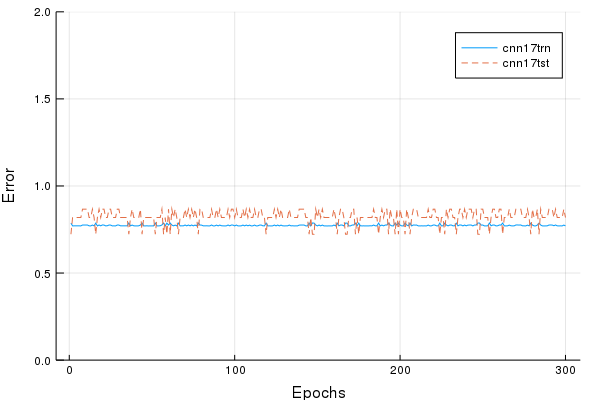

In [9]:
plot([cnn17[3,:],cnn17[4,:]],ylim=(0.0,2),
    labels=[:cnn17trn :cnn17tst],xlabel="Epochs",ylabel="Error")  

In [11]:
"CNN17", ("Train accuracy",(1-cnn17[3,:][end])),("Test accuracy",1-cnn17[4,:][end])

("CNN17", ("Train accuracy", 0.22941178f0), ("Test accuracy", 0.18124998f0))

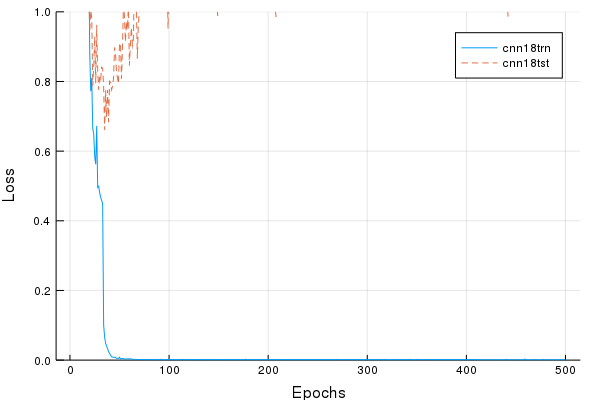

In [8]:
cnn18=Knet.load("models/dcnn9.jld2","results");
#dcnn6 λ1=4f-7 lr=0.95 ep=500 dropout=,0.5
plot([cnn18[1,:],cnn18[2,:]],ylim=(0.0,1.0),
     labels=[:cnn18trn :cnn18tst],xlabel="Epochs",ylabel="Loss")


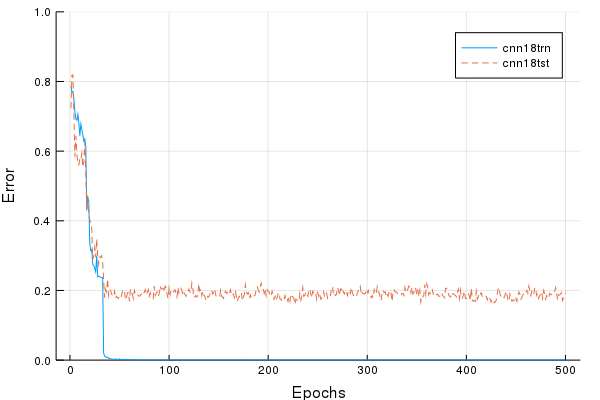

In [10]:
plot([cnn18[3,:],cnn18[4,:]],ylim=(0.0,1),
    labels=[:cnn18trn :cnn18tst],xlabel="Epochs",ylabel="Error")  

In [6]:
"CNN18", ("Train accuracy",(1-cnn18[3,:][end])),("Test accuracy",1-cnn18[4,:][end])

("CNN18", ("Train accuracy", 0.99944854f0), ("Test accuracy", 0.80625f0))